    ==============================================================================================

## Importing the DataFrames
- ``` df = pd.read_pickle("file_name.pkl")```  --> create 1 df from a pkl file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.min_rows", 0) 
pd.set_option("display.max_rows", 30) 
pd.__version__

'1.4.4'

In [2]:
db_qu = pd.read_pickle("clean_Tables\Merged_c.pkl")

In [3]:
db_qu.columns

Index(['ORD_ID', 'ord_CreatDate', 'ord_TotlPaid', 'OL_ID', 'ol_ProdQnty',
       'ol_ProdUntPr', 'ol_ProcessDate', 'PRO_SKU', 'pro_Name', 'pro_Desc',
       'pro_Pr', 'pro_InStock', 'pro_Type'],
      dtype='object')

    ==============================================================================================

## Answer Bussines questions


- Concerns
    A. The main investors pointed out the company’s recent quarterly results showed
        1.  increase in orders placed but a decrease in the total revenue. They prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market.
    B. Questions
        1. How products should be classified into different categories to simplify reports and analysis.
        2. What is the distribution of product prices across different categories.
        3. How many products are being discounted.
        4. How big are the offered discounts as a percentage of the product prices. --> tmp_dis_per

### Discount Variation with Time


In [4]:
#drop_list=["ORD_ID","ord_TotlPaid","ol_ProdQnty","ord_CreatDate","OL_ID","ol_ProcessDate","pro_InStock"]

In [10]:

db_timDis=round(
    db_qu
    .groupby([db_qu.ol_ProcessDate.dt.strftime("%Y-%m")])
    .agg( AvgUnitPrice      =("pro_Pr","mean")
         ,AvgDisUnitPrice   =("ol_ProdUntPr","mean")
         ,NumUniqProducts   =("PRO_SKU",pd.Series.nunique)
         ,NumUniqOrders     =("ORD_ID",pd.Series.nunique)
         ,TotalRevenue      =("ord_TotlPaid","sum")
         ,TotalSoldProdQnty =("ol_ProdQnty","sum")
         ,ProNameSample     =("pro_Name","max")
         ,ProDescSample     =("pro_Desc","max")
         )
    #.nlargest(10,"ol_ProdQnty")
    .reset_index()
)
db_timDis= (
    db_timDis
    .assign(AvgDiscoutPercent = np.where((db_timDis.AvgUnitPrice== 0.0)
                                   ,100
                                   ,round(((db_timDis.AvgUnitPrice-db_timDis.AvgDisUnitPrice)/db_timDis.AvgUnitPrice)*100,2)
                                   ))
    )


In [11]:
db_timDis

,ol_ProcessDate,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,ProNameSample,ProDescSample,AvgDiscoutPercent
0,2017-01,198.0,162.0,1919,5052,1789646.0,7520,internal battery for iPhone 5,zippered sleeve type card case book for iPhone...,18.18
1,2017-02,226.0,195.0,1337,2206,893778.0,3224,internal battery for iPhone 5,wireless mouse with nano receiver and curved d...,13.72
2,2017-03,429.0,380.0,235,203,228345.0,307,internal battery for iPhone 5,with standard digital pen tip and triangular d...,11.42
3,2017-04,241.0,210.0,1100,1629,829176.0,2438,internal battery for iPhone 5,with standard digital pen tip and triangular d...,12.86
4,2017-05,261.0,228.0,1241,1881,1013294.0,2936,internal battery for iPhone 5,waterproof case resistant to extreme condition...,12.64
5,2017-06,341.0,300.0,1162,1588,1078772.0,2470,internal battery for iPhone 5,waterproof case for extreme conditions and iPh...,12.02
6,2017-07,265.0,225.0,1643,3409,1733191.0,5196,internal battery for iPhone 5,with standard digital pen tip and triangular d...,15.09
7,2017-08,260.0,219.0,1332,2324,1106173.0,3391,internal battery for iPhone 5,with standard digital pen tip and triangular d...,15.77
8,2017-09,330.0,280.0,1233,2171,1336076.0,3215,internal battery for iPhone 5,waterproof case for extreme conditions and iPh...,15.15
9,2017-10,291.0,246.0,1460,3107,1679467.0,4576,internal battery for iPhone 5,zippered sleeve type card case book for iPhone...,15.46


In [ ]:
#db_timDis.to_csv("test.csv")

In [12]:
round(db_timDis.describe())

,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,AvgDiscoutPercent
count,15.0,15.0,15.0,15.0,15.0,15.0,15.0
mean,285.0,244.0,1439.0,3068.0,1626616.0,4557.0,14.0
std,56.0,51.0,521.0,1867.0,1118493.0,2799.0,2.0
min,198.0,162.0,235.0,203.0,228345.0,307.0,11.0
25%,260.0,222.0,1198.0,1755.0,953536.0,2703.0,13.0
50%,265.0,228.0,1337.0,2324.0,1336076.0,3391.0,15.0
75%,311.0,264.0,1783.0,4230.0,1761418.0,6357.0,15.0
max,429.0,380.0,2338.0,7144.0,4770226.0,11067.0,18.0


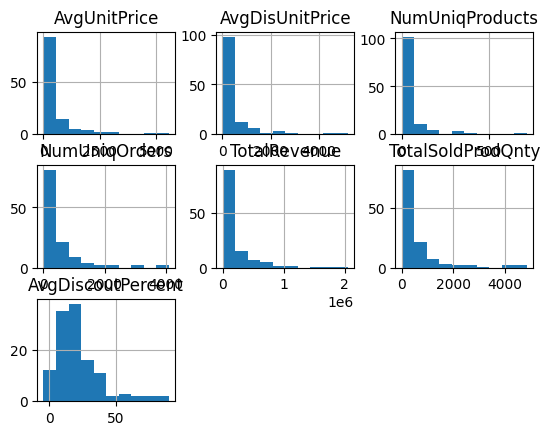

In [149]:
db_timDis.hist();

- Get Top 10s

In [150]:
db_timDis.sample(3)

,tmp_type_1,tmp_type_2,AvgUnitPrice,AvgDisUnitPrice,NumUniqProducts,NumUniqOrders,TotalRevenue,TotalSoldProdQnty,ProNameSample,ProDescSample,AvgDiscoutPercent
17,1364,0,145.0,110.0,180,3243,753618.0,4088,Open - SO-DIMM memory Kingston 4GB 1600Mhz DDR3åÊ,modules RAM 64GB (4x16GB) Mac Pro (2009-2010).,24.14
21,1404,0,134.0,124.0,17,63,26584.0,72,Synology Rail Kit sliding RKS1314,expansion module for Nas eSATA and 5 bays,7.46
30,1714,0,469.0,446.0,20,274,186859.0,306,Open - Apple iPad Wi-Fi 32GB Space Gray,iPad Wi-Fi 32GB with box but unused is perfect,4.90


In [ ]:
# g=sns.relplot(data=db_types
#             ,x="AvgUnitPrice"
#             ,y= "AvgDiscoutPercent"
#             )
sns.relplot(data=db_timDis
            ,kind="line"
            ,x="AvgDiscoutPercent"
            ,y="TotalRevenue"
            #,hue="TotalSoldProdQnty"
            #,style="event",
)


In [ ]:
pd.set_option("display.max_colwidth", 5000) 
db_timDis.sample(3)